# CS229 Project Lending Club Data Analysis
Author: Xinyi Yang
## 1. Dataset overview

In [27]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import glob
import xgboost as xgb
%matplotlib inline

/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
allFiles = glob.glob("Lending_club_data_Dec8/*.csv")
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    frame = pd.read_csv(file_,skiprows=[0])
    print file_
    print frame.shape
    list_.append(frame)
df = pd.concat(list_,ignore_index=True)
df.head(10)

/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lending_club_data_Dec8/LoanStats3a_securev1.csv
(42538, 151)


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,49,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lending_club_data_Dec8/LoanStats3b_securev1.csv
(188183, 151)


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lending_club_data_Dec8/LoanStats3c_securev1.csv
(235631, 151)


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lending_club_data_Dec8/LoanStats3d_securev1.csv
(421097, 151)


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lending_club_data_Dec8/LoanStats_securev1_2016Q1.csv
(133889, 151)
Lending_club_data_Dec8/LoanStats_securev1_2016Q2.csv
(97856, 151)
Lending_club_data_Dec8/LoanStats_securev1_2016Q3.csv
(99122, 151)


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lending_club_data_Dec8/LoanStats_securev1_2016Q4.csv
(103548, 151)


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,118,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lending_club_data_Dec8/LoanStats_securev1_2017Q1.csv
(96781, 151)


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lending_club_data_Dec8/LoanStats_securev1_2017Q2.csv
(105453, 151)


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lending_club_data_Dec8/LoanStats_securev1_2017Q3.csv
(122703, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,NaN,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,NaN,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,NaN,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,NaN,5600.0,5600.0,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,NaN,5375.0,5375.0,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.shape

(1646801, 151)

In [20]:
df.id.nunique()

1646801

In [31]:
df.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

## 2. Feature Engineering
### Process target column

In [21]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Current',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period',
       'Default', 'Issued'], dtype=object)

In [3]:
def categorize(l):
    uniques = sorted(list(set(l)))
    return [uniques.index(x) + 1 for x in l]

In [4]:
df.loan_status.value_counts(dropna=False)

Current                                                838771
Fully Paid                                             603668
Charged Off                                            154375
Late (31-120 days)                                      24782
In Grace Period                                         14984
Late (16-30 days)                                        6684
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Issued                                                    540
Default                                                   225
NaN                                                        23
Name: loan_status, dtype: int64

In [12]:
def target_handler(df):
    if df['loan_status'] == 'Fully Paid':
        return 1
    elif df['loan_status'] in ('Default', 'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off'):
        return -1
    elif df['loan_status'] in ('In Grace Period', 'Current','Issued'):
        return 0

df['target'] = df.apply(target_handler, axis=1)
df['target'].value_counts(dropna=False)

 1    575939
-1    173045
Name: target, dtype: int64

In [11]:
# Only include +1 and -1
df.dropna(subset=['target'], how='all', inplace=True)
df = df[(df['target'] == 1.0) | (df['target'] == -1.0)]

### Process predictors

In [7]:
# Drop unneccesary columns
df = df.drop(['url', 'desc', 'policy_code', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line', 'emp_title'], axis=1)
df = df.drop(['id', 'title', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'zip_code'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12964de90>]], dtype=object)

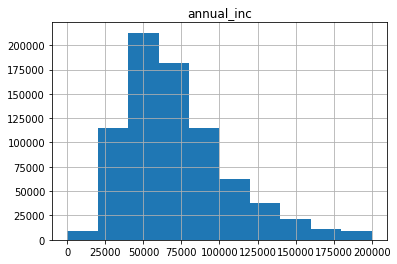

In [7]:
df.annual_inc.value_counts(sort=True)
df.hist(column='annual_inc', bins=10, range=(0,200000.0))

Code categorical variables

In [13]:
print df.home_ownership.value_counts(dropna=False) # useful
print df.pymnt_plan.value_counts(dropna=False) # not useful
print df.purpose.value_counts(dropna=False) # useful
print df.grade.value_counts(dropna=False) # reserved 
print df.sub_grade.value_counts(dropna=False) # useful
print df.emp_length.value_counts(dropna=False) # useful

MORTGAGE    373615
RENT        302747
OWN          72359
OTHER          140
ANY             81
NONE            42
Name: home_ownership, dtype: int64
n    746179
y      2805
Name: pymnt_plan, dtype: int64
debt_consolidation    445280
credit_card           159034
home_improvement       46044
other                  39861
major_purchase         16045
small_business          9839
car                     8208
medical                 7865
moving                  5245
vacation                4592
house                   3854
wedding                 2236
renewable_energy         563
educational              318
Name: purpose, dtype: int64
B    214133
C    207902
A    119577
D    118847
E     60415
F     22268
G      5842
Name: grade, dtype: int64
B3    46951
B4    46829
C1    45956
C2    43873
B5    43388
C3    41288
B2    40557
C4    40473
B1    36408
C5    36312
A5    34341
D1    30201
A4    28387
D2    26257
D3    22775
D4    21645
A1    19420
A3    19303
A2    18126
D5    17969
E1    15431


In [47]:
print df.inq_last_12m.value_counts(dropna=False) # not useful
print df.inq_fi.value_counts(dropna=False) # not useful
print df.total_cu_tl.value_counts(dropna=False) # not useful
print df.application_type.value_counts(dropna=False) # not useful
print df.acc_now_delinq.value_counts(dropna=False) # not useful? 800 record only
print df.addr_state.value_counts(dropna=False) # useful -> categorical
print df.verification_status.value_counts(dropna=False) # useful -> categorical
print df.delinq_2yrs.value_counts(dropna=False) # useful
print df.open_rv_24m.value_counts(dropna=False) # not useful
print df.installment.value_counts(dropna=False) # ??? -> need to bin if we want to use it
print df.pub_rec.value_counts(dropna=False) # useful

NaN      592523
 1.0      34836
 0.0      33283
 2.0      27852
 3.0      19950
 4.0      13749
 5.0       8894
 6.0       5814
 7.0       3898
 8.0       2611
 9.0       1701
 10.0      1097
 11.0       809
 12.0       519
 13.0       409
 14.0       281
 15.0       210
 16.0       151
 17.0        99
 19.0        64
 18.0        58
 20.0        43
 21.0        38
 22.0        27
 23.0        19
 27.0        11
 24.0        10
 25.0         7
 32.0         4
 31.0         4
 26.0         4
 29.0         3
 28.0         3
 40.0         2
 30.0         1
Name: inq_last_12m, dtype: int64
NaN      592522
 0.0      73761
 1.0      38464
 2.0      20564
 3.0      10796
 4.0       5554
 5.0       3231
 6.0       1678
 7.0        955
 8.0        583
 9.0        337
 10.0       189
 11.0       114
 12.0        90
 13.0        53
 14.0        30
 15.0        19
 16.0        12
 17.0        10
 19.0         5
 18.0         4
 21.0         3
 23.0         3
 20.0         3
 24.0         2
 22.0  

In [20]:
# One hot encoding for non-ordinal categorical variables
home = pd.get_dummies(df.home_ownership,prefix='home_')
purpose = pd.get_dummies(df.purpose,prefix='purpose_')
veri_status = pd.get_dummies(df.verification_status)
state = pd.get_dummies(df.addr_state, prefix='state_')
term = pd.get_dummies(df.term, prefix='term_')

# Label encoding for ordinal categorical variables
df.dropna(subset=['emp_length'], how='all', inplace=True)
emp_length_ord = ['< 1 year', '1 year','2 years', '3 years','4 years','5 years', '6 years','7 years', '8 years', '9 years','10+ years']
df.emp_length = pd.Categorical(df.emp_length, ordered=True, categories=emp_length_ord)
df.emp_length = pd.factorize(df.emp_length, sort=True)[0]

# A1 = 0, ..., G5 = 34
#df.dropna(subset=['sub_grade'], how='all', inplace=True)
#df.sub_grade = pd.Categorical(df.sub_grade, ordered=True)
#df.sub_grade = pd.factorize(df.sub_grade, sort=True)[0]


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  # This is added back by InteractiveShellApp.init_path()
/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  # This is added back by InteractiveShellApp.init_path()


In [21]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float64') / 100

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [22]:
predictor=pd.concat([df.annual_inc, df.delinq_2yrs, df.dti,
                     df.emp_length, home, df.installment,
                     df.loan_amnt, df.int_rate, df.acc_now_delinq,
                    purpose, term['term__ 36 months']
                     ], axis=1)
predictor.dropna(axis=0, how='all')
predictor.isnull().sum()
# predictor.loc[:10]
#for i in predictor:
#    print predictor[i].value_counts(dropna=False)

annual_inc                     0
delinq_2yrs                    0
dti                            0
emp_length                     0
home__ANY                      0
home__MORTGAGE                 0
home__NONE                     0
home__OTHER                    0
home__OWN                      0
home__RENT                     0
installment                    0
loan_amnt                      0
int_rate                       0
acc_now_delinq                 0
purpose__car                   0
purpose__credit_card           0
purpose__debt_consolidation    0
purpose__educational           0
purpose__home_improvement      0
purpose__house                 0
purpose__major_purchase        0
purpose__medical               0
purpose__moving                0
purpose__other                 0
purpose__renewable_energy      0
purpose__small_business        0
purpose__vacation              0
purpose__wedding               0
term__ 36 months               0
dtype: int64

In [14]:
pd.set_option('display.max_columns', None)
print predictor.head()

   annual_inc  delinq_2yrs    dti  emp_length  home__ANY  home__MORTGAGE  \
0     24000.0          0.0  27.65           0          0               0   
1     30000.0          0.0   1.00           0          0               0   
2     12252.0          0.0   8.72           0          0               0   
3     49200.0          0.0  20.00           0          0               0   
4     80000.0          0.0  17.94           0          0               0   

   home__NONE  home__OTHER  home__OWN  home__RENT  installment  loan_amnt  \
0           0            0          0           1       162.87     5000.0   
1           0            0          0           1        59.83     2500.0   
2           0            0          0           1        84.33     2400.0   
3           0            0          0           1       339.31    10000.0   
4           0            0          0           1        67.79     3000.0   

   int_rate  acc_now_delinq  pub_rec  purpose__car  purpose__credit_card  \
0   

In [18]:
print predictor.shape
print df.shape
print df['target'].value_counts(dropna=False)

(789734, 29)
(748984, 139)
 1    575939
-1    173045
Name: target, dtype: int64


In [17]:
df.loan_status = pd.Categorical(df.loan_status, ordered=True)
df.loan_status = pd.factorize(df.loan_status, sort=True)[0]
print df.loan_status.value_counts(dropna=False)

2    575939
0    143632
4     23083
3      6123
1       207
Name: loan_status, dtype: int64


## 3. Train and evaluate models
### Train-test split

In [23]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    predictor, df['target'], test_size=0.2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    predictor, df['loan_status'], test_size=0.2)

In [19]:
print Y_train1.shape
print Y_train2.shape

(599187,)
(599187,)


### Choosing and evaluating models

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, f1_score
def evaluateModel1(Y_test,Y_predict):
    print 'Accuracy: ', round(accuracy_score(Y_test,Y_predict),2)
    print 'ROC_AUC score: ', round(roc_auc_score(Y_test,Y_predict),2)
    
    print 'f-score: ', round(f1_score(Y_test,Y_predict),2)
    print 'Precission: ', round(precision_score(Y_test,Y_predict),2)
    print 'Recall: ', round(recall_score(Y_test,Y_predict),2)
    print (classification_report(Y_test,Y_predict))
    print (confusion_matrix(Y_test,Y_predict))

def evaluateModel2(Y_test,Y_predict):
    print 'Accuracy: ', round(accuracy_score(Y_test,Y_predict),2)
    #print 'ROC_AUC score: ', round(roc_auc_score(Y_test,Y_predict),2)   
    #print 'f-score: ', round(f1_score(Y_test,Y_predict),2)
    #print 'Precission: ', round(precision_score(Y_test,Y_predict),2)
    #print 'Recall: ', round(recall_score(Y_test,Y_predict),2)
    print (classification_report(Y_test,Y_predict))
    print (confusion_matrix(Y_test,Y_predict))

### Logistic regression

In [21]:
from sklearn import linear_model
logit = linear_model.LogisticRegression()
logit.fit(X_train1, Y_train1)
logit_pred = logit.predict(X_test1)
evaluateModel1(Y_test1, logit_pred)
coef = pd.concat([pd.DataFrame(X_train1.columns),pd.DataFrame(np.transpose(logit.coef_))], axis = 1)
coef.columns = ['Feature', 'Coefficient']
coef.sort_values(by=['Coefficient'], ascending=False, inplace=True)
print coef

Accuracy:  0.77
ROC_AUC score:  0.5
f-score:  0.87
Precission:  0.77
Recall:  1.0
             precision    recall  f1-score   support

       -1.0       0.17      0.00      0.00     34707
        1.0       0.77      1.00      0.87    115090

avg / total       0.63      0.77      0.67    149797

[[     9  34698]
 [    43 115047]]
                        Feature   Coefficient
2                           dti  1.267135e-02
28             term__ 36 months  2.606310e-03
10                  installment  1.930275e-03
5                home__MORTGAGE  1.207328e-03
16  purpose__debt_consolidation  7.584386e-04
15         purpose__credit_card  7.478183e-04
9                    home__RENT  4.132184e-04
8                     home__OWN  1.558120e-04
18    purpose__home_improvement  9.488671e-05
20      purpose__major_purchase  6.471746e-05
23               purpose__other  6.307406e-05
14                 purpose__car  6.271151e-05
27             purpose__wedding  2.370141e-05
0                    ann

#### Multiclass logicstic regression -  one-vs-rest (OvR) scheme

In [36]:
from sklearn import linear_model
ovr = linear_model.LogisticRegression(multi_class='ovr')
ovr.fit(X_train2, Y_train2)
ovr_pred = ovr.predict(X_test2)
evaluateModel2(Y_test2, ovr_pred)
coef = pd.concat([pd.DataFrame(X_train2.columns),
                  pd.DataFrame(np.transpose(ovr.coef_))], axis = 1)
coef.columns = ['Feature', 'Coefficient']
coef.sort_values(by=['Coefficient'], ascending=False, inplace=True)
print coef

Accuracy:  0.77
             precision    recall  f1-score   support

          0       0.20      0.00      0.00     28902
          1       0.00      0.00      0.00        32
          2       0.77      1.00      0.87    115056
          3       0.00      0.00      0.00      1196
          4       0.00      0.00      0.00      4611

avg / total       0.63      0.77      0.67    149797

[[    13      0  28889      0      0]
 [     0      0     32      0      0]
 [    50      0 115006      0      0]
 [     0      0   1196      0      0]
 [     1      0   4610      0      0]]


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: Length mismatch: Expected axis has 6 elements, new values have 2 elements

### Naive Bayes

In [22]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train2, Y_train2)
nb_pred = nb.predict(X_test2)
evaluateModel2(Y_test2, nb_pred)

Accuracy:  0.77
             precision    recall  f1-score   support

          0       0.44      0.00      0.01     28654
          1       0.00      0.00      0.00        39
          2       0.77      1.00      0.87    115298
          3       0.00      0.00      0.00      1194
          4       0.00      0.00      0.00      4612

avg / total       0.68      0.77      0.67    149797

[[    96      0  28558      0      0]
 [     0      0     39      0      0]
 [   106      0 115192      0      0]
 [     3      0   1191      0      0]
 [    15      0   4597      0      0]]


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM

In [ ]:
from sklearn import metrics, svm
svm = svm.SVC()
svm.fit(X_train1, Y_train1)
svm_pred = svm.predict(X_test1)
evaluateModel1(Y_test1, svm_pred)

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train1, Y_train1)

print("Decision tree - Normal data set")
print(metrics.accuracy_score(Y_test1, dt.predict(X_test1)))
print(metrics.roc_auc_score(Y_test1, dt.predict(X_test1)))
print(metrics.confusion_matrix(Y_test1, dt.predict(X_test1)))

Decision tree - Normal data set
0.673291187407
0.551140680038
[[11228 23479]
 [25461 89629]]


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train1, Y_train1)
rf_pred = clf.predict(X_test1)
evaluateModel1(Y_test1, rf_pred)

Accuracy:  0.73
ROC_AUC score:  0.57
f-score:  0.83
Precission:  0.8
Recall:  0.87
             precision    recall  f1-score   support

       -1.0       0.39      0.26      0.31     34707
        1.0       0.80      0.87      0.83    115090

avg / total       0.70      0.73      0.71    149797

[[  9130  25577]
 [ 14420 100670]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier()
rf2.fit(X_train2, Y_train2)
rf_pred2 = rf2.predict(X_test2)
evaluateModel2(Y_test2, rf_pred2)

Accuracy:  0.74
             precision    recall  f1-score   support

          0       0.34      0.18      0.24     28902
          1       0.00      0.00      0.00        32
          2       0.79      0.92      0.85    115056
          3       0.00      0.00      0.00      1196
          4       0.12      0.00      0.01      4611

avg / total       0.67      0.74      0.70    149797

[[  5203      0  23638      9     52]
 [     5      0     27      0      0]
 [  9059      2 105901      6     88]
 [   188      0   1002      0      6]
 [   781      0   3811      0     19]]


### XGBoost

In [30]:
X_val1, X_test1, Y_val1, Y_test1 = train_test_split(
    X_test1, Y_test1, test_size=0.5)
X_val2, X_test2, Y_val2, Y_test2 = train_test_split(
    X_test2, Y_test2, test_size=0.5)

In [31]:

#dtrain = xgb.DMatrix(X_train1, label=Y_train1)
#sum_wneg = (Y_train == 0).sum()
#sum_wpos = (Y_train == 1).sum()
#spw = float(sum_wneg/sum_wpos)
xgb1 = xgb.XGBClassifier(min_child_weight=1, max_depth=6,
                    n_estimators=360, reg_alpha=0.001,
                    subsample=0.8)
# a drop in n_estimator=365 then rise in n_estimator=448
# Overfitting after n_estimator > 710 (AUC decreases)
xgb1.fit(X_train1, Y_train1, eval_metric='auc', eval_set=[(X_val1, Y_val1)], verbose=True)
xgb_pred1 = xgb1.predict(X_test1)
evaluateModel1(Y_test1, xgb_pred1)

/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0]	validation_0-auc:0.692939
[1]	validation_0-auc:0.695696
[2]	validation_0-auc:0.696145
[3]	validation_0-auc:0.696868
[4]	validation_0-auc:0.69732
[5]	validation_0-auc:0.697935
[6]	validation_0-auc:0.698466
[7]	validation_0-auc:0.6992
[8]	validation_0-auc:0.699507
[9]	validation_0-auc:0.699856
[10]	validation_0-auc:0.70028
[11]	validation_0-auc:0.700794
[12]	validation_0-auc:0.70116
[13]	validation_0-auc:0.701375
[14]	validation_0-auc:0.701737
[15]	validation_0-auc:0.70192
[16]	validation_0-auc:0.702266
[17]	validation_0-auc:0.702442
[18]	validation_0-auc:0.702573
[19]	validation_0-auc:0.703166
[20]	validation_0-auc:0.703668
[21]	validation_0-auc:0.703806
[22]	validation_0-auc:0.704224
[23]	validation_0-auc:0.704524
[24]	validation_0-auc:0.704848
[25]	validation_0-auc:0.705254
[26]	validation_0-auc:0.705461
[27]	validation_0-auc:0.705725
[28]	validation_0-auc:0.705957
[29]	validation_0-auc:0.706105
[30]	validation_0-auc:0.7063
[31]	validation_0-auc:0.706431
[32]	validation_0-auc:0.70

[261]	validation_0-auc:0.715707
[262]	validation_0-auc:0.71571
[263]	validation_0-auc:0.715715
[264]	validation_0-auc:0.715743
[265]	validation_0-auc:0.715729
[266]	validation_0-auc:0.71572
[267]	validation_0-auc:0.715754
[268]	validation_0-auc:0.715769
[269]	validation_0-auc:0.715784
[270]	validation_0-auc:0.71578
[271]	validation_0-auc:0.715795
[272]	validation_0-auc:0.715807
[273]	validation_0-auc:0.715806
[274]	validation_0-auc:0.715812
[275]	validation_0-auc:0.715804
[276]	validation_0-auc:0.715802
[277]	validation_0-auc:0.715784
[278]	validation_0-auc:0.715771
[279]	validation_0-auc:0.71575
[280]	validation_0-auc:0.715769
[281]	validation_0-auc:0.715746
[282]	validation_0-auc:0.715729
[283]	validation_0-auc:0.715698
[284]	validation_0-auc:0.715701
[285]	validation_0-auc:0.715693
[286]	validation_0-auc:0.715673
[287]	validation_0-auc:0.715674
[288]	validation_0-auc:0.715692
[289]	validation_0-auc:0.715714
[290]	validation_0-auc:0.715722
[291]	validation_0-auc:0.715705
[292]	valida

In [ ]:
# Resample

In [33]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection()
X_resampled, Y_resampled = oss.fit_sample(predictor, df['target'])
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(
    X_resampled, Y_resampled, test_size=0.2)
X_val3, X_test3, Y_val3, Y_test3 = train_test_split(
    X_test3, Y_test3, test_size=0.5)

In [35]:
print X_resampled.shape
print Y_resampled.shape
print X_train1.shape
print (Y_train1 == -1).sum()
print (Y_train1 == 1).sum()
print (Y_resampled == -1).sum()
print (Y_resampled == 1).sum()

(680573, 29)
(680573,)
(599187, 29)
138338
460849
173045
507528


In [36]:
# Random forest resampling
clf = RandomForestClassifier()
clf.fit(X_train3, Y_train3)
rf_pred3 = clf.predict(X_test3)
evaluateModel1(Y_test3, rf_pred3)

Accuracy:  0.72
ROC_AUC score:  0.6
f-score:  0.82
Precission:  0.79
Recall:  0.85
             precision    recall  f1-score   support

       -1.0       0.44      0.34      0.38     17146
        1.0       0.79      0.85      0.82     50912

avg / total       0.70      0.72      0.71     68058

[[ 5817 11329]
 [ 7404 43508]]


In [37]:
xgb3 = xgb.XGBClassifier(min_child_weight=1, max_depth=6,
                    n_estimators=500, reg_alpha=0.001,
                    subsample=0.8)
xgb3.fit(X_train3, Y_train3, eval_metric='auc', eval_set=[(X_val3, Y_val3)], verbose=True)
xgb_pred3 = xgb3.predict(X_test3)
evaluateModel1(Y_test3, xgb_pred3)

[0]	validation_0-auc:0.710112
[1]	validation_0-auc:0.712243
[2]	validation_0-auc:0.712502
[3]	validation_0-auc:0.712904
[4]	validation_0-auc:0.713455
[5]	validation_0-auc:0.713595
[6]	validation_0-auc:0.714172
[7]	validation_0-auc:0.71461
[8]	validation_0-auc:0.714927
[9]	validation_0-auc:0.715224
[10]	validation_0-auc:0.715694
[11]	validation_0-auc:0.716157
[12]	validation_0-auc:0.716448
[13]	validation_0-auc:0.716977
[14]	validation_0-auc:0.717289
[15]	validation_0-auc:0.717657
[16]	validation_0-auc:0.717833
[17]	validation_0-auc:0.718191
[18]	validation_0-auc:0.7184
[19]	validation_0-auc:0.718648
[20]	validation_0-auc:0.718912
[21]	validation_0-auc:0.719289
[22]	validation_0-auc:0.71981
[23]	validation_0-auc:0.719983
[24]	validation_0-auc:0.720404
[25]	validation_0-auc:0.72081
[26]	validation_0-auc:0.721139
[27]	validation_0-auc:0.721207
[28]	validation_0-auc:0.721381
[29]	validation_0-auc:0.721582
[30]	validation_0-auc:0.721908
[31]	validation_0-auc:0.722083
[32]	validation_0-auc:0

[261]	validation_0-auc:0.730836
[262]	validation_0-auc:0.730843
[263]	validation_0-auc:0.730827
[264]	validation_0-auc:0.730828
[265]	validation_0-auc:0.730834
[266]	validation_0-auc:0.730825
[267]	validation_0-auc:0.730876
[268]	validation_0-auc:0.730881
[269]	validation_0-auc:0.730886
[270]	validation_0-auc:0.730916
[271]	validation_0-auc:0.730912
[272]	validation_0-auc:0.730906
[273]	validation_0-auc:0.730936
[274]	validation_0-auc:0.730927
[275]	validation_0-auc:0.730957
[276]	validation_0-auc:0.730963
[277]	validation_0-auc:0.730947
[278]	validation_0-auc:0.730946
[279]	validation_0-auc:0.730951
[280]	validation_0-auc:0.730967
[281]	validation_0-auc:0.730973
[282]	validation_0-auc:0.730979
[283]	validation_0-auc:0.730951
[284]	validation_0-auc:0.730944
[285]	validation_0-auc:0.730912
[286]	validation_0-auc:0.730943
[287]	validation_0-auc:0.730947
[288]	validation_0-auc:0.73095
[289]	validation_0-auc:0.730967
[290]	validation_0-auc:0.731004
[291]	validation_0-auc:0.731014
[292]	val

In [24]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_resampled2, Y_resampled2 = sm.fit_sample(predictor, df['target'])
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(
    X_resampled2, Y_resampled2, test_size=0.2)
X_val4, X_test4, Y_val4, Y_test4 = train_test_split(
    X_test4, Y_test4, test_size=0.5)

In [25]:
print X_resampled2.shape
print Y_resampled2.shape
print (Y_resampled2 == -1).sum()
print (Y_resampled2 == 1).sum()

(1151878, 29)
(1151878,)
575939
575939


In [41]:
# Random forest resampling
clf = RandomForestClassifier()
clf.fit(X_train4, Y_train4)
rf_pred4 = clf.predict(X_test4)
evaluateModel1(Y_test4, rf_pred4)

Accuracy:  0.81
ROC_AUC score:  0.81
f-score:  0.81
Precission:  0.79
Recall:  0.83
             precision    recall  f1-score   support

       -1.0       0.83      0.78      0.80     57544
        1.0       0.79      0.83      0.81     57644

avg / total       0.81      0.81      0.81    115188

[[45016 12528]
 [ 9538 48106]]


In [28]:
xgb4 = xgb.XGBClassifier(min_child_weight=1, max_depth=6,
                    n_estimators=500, reg_alpha=0.001,
                    subsample=0.8)
xgb4.fit(X_train4, Y_train4, eval_metric='auc', eval_set=[(X_val4, Y_val4)], verbose=True)


[0]	validation_0-auc:0.832955
[1]	validation_0-auc:0.845041
[2]	validation_0-auc:0.849807
[3]	validation_0-auc:0.860976
[4]	validation_0-auc:0.862958
[5]	validation_0-auc:0.863106
[6]	validation_0-auc:0.865728
[7]	validation_0-auc:0.866329
[8]	validation_0-auc:0.867614
[9]	validation_0-auc:0.868586
[10]	validation_0-auc:0.870169
[11]	validation_0-auc:0.871403
[12]	validation_0-auc:0.872288
[13]	validation_0-auc:0.87332
[14]	validation_0-auc:0.874193
[15]	validation_0-auc:0.875016
[16]	validation_0-auc:0.875922
[17]	validation_0-auc:0.876696
[18]	validation_0-auc:0.877905
[19]	validation_0-auc:0.878874
[20]	validation_0-auc:0.879381
[21]	validation_0-auc:0.879908
[22]	validation_0-auc:0.880022
[23]	validation_0-auc:0.880596
[24]	validation_0-auc:0.88114
[25]	validation_0-auc:0.881558
[26]	validation_0-auc:0.882648
[27]	validation_0-auc:0.883429
[28]	validation_0-auc:0.883624
[29]	validation_0-auc:0.883924
[30]	validation_0-auc:0.884262
[31]	validation_0-auc:0.884633
[32]	validation_0-au

[261]	validation_0-auc:0.903371
[262]	validation_0-auc:0.903375
[263]	validation_0-auc:0.903383
[264]	validation_0-auc:0.903492
[265]	validation_0-auc:0.903504
[266]	validation_0-auc:0.903568
[267]	validation_0-auc:0.903571
[268]	validation_0-auc:0.903637
[269]	validation_0-auc:0.903658
[270]	validation_0-auc:0.90366
[271]	validation_0-auc:0.903671
[272]	validation_0-auc:0.903677
[273]	validation_0-auc:0.9037
[274]	validation_0-auc:0.903704
[275]	validation_0-auc:0.903719
[276]	validation_0-auc:0.903762
[277]	validation_0-auc:0.90378
[278]	validation_0-auc:0.903786
[279]	validation_0-auc:0.903794
[280]	validation_0-auc:0.903812
[281]	validation_0-auc:0.903819
[282]	validation_0-auc:0.903823
[283]	validation_0-auc:0.903834
[284]	validation_0-auc:0.903896
[285]	validation_0-auc:0.903914
[286]	validation_0-auc:0.903916
[287]	validation_0-auc:0.903934
[288]	validation_0-auc:0.904033
[289]	validation_0-auc:0.904094
[290]	validation_0-auc:0.904104
[291]	validation_0-auc:0.904108
[292]	valida

NameError: name 'xgb3' is not defined

In [31]:
xgb_pred4 = xgb4.predict(X_test4)
evaluateModel1(Y_test4, xgb_pred4)

Accuracy:  0.84
ROC_AUC score:  0.84
f-score:  0.86
Precission:  0.78
Recall:  0.95
             precision    recall  f1-score   support

         -1       0.93      0.74      0.82     57758
          1       0.78      0.95      0.86     57430

avg / total       0.86      0.84      0.84    115188

[[42488 15270]
 [ 3011 54419]]


In [50]:
sum_wneg = (Y_train1 == -1).sum()
sum_wpos = (Y_train1 == 1).sum()
spw = float(sum_wpos) /sum_wneg
print sum_wneg
print sum_wpos
print spw

138463
460724
3.32741598839


In [52]:
xgb2 = xgb.XGBClassifier(min_child_weight=1, max_depth=6,
                    n_estimators=560, reg_alpha=0.001,
                    subsample=0.8, scale_pos_weight=spw)
xgb2.fit(X_train1, Y_train1, eval_metric='auc', eval_set=[(X_val1, Y_val1)], verbose=True)
xgb_pred2 = xgb2.predict(X_test1)
evaluateModel1(Y_test1, xgb_pred2)
#560

[0]	validation_0-auc:0.689894
[1]	validation_0-auc:0.691536
[2]	validation_0-auc:0.693331
[3]	validation_0-auc:0.693534
[4]	validation_0-auc:0.694159
[5]	validation_0-auc:0.694792
[6]	validation_0-auc:0.694926
[7]	validation_0-auc:0.695203
[8]	validation_0-auc:0.695428
[9]	validation_0-auc:0.695729
[10]	validation_0-auc:0.695929
[11]	validation_0-auc:0.696321
[12]	validation_0-auc:0.696485
[13]	validation_0-auc:0.696509
[14]	validation_0-auc:0.696824
[15]	validation_0-auc:0.697032
[16]	validation_0-auc:0.697287
[17]	validation_0-auc:0.697575
[18]	validation_0-auc:0.697784
[19]	validation_0-auc:0.697974
[20]	validation_0-auc:0.698171
[21]	validation_0-auc:0.698549
[22]	validation_0-auc:0.698855
[23]	validation_0-auc:0.699067
[24]	validation_0-auc:0.699379
[25]	validation_0-auc:0.699514
[26]	validation_0-auc:0.699606
[27]	validation_0-auc:0.699989
[28]	validation_0-auc:0.700182
[29]	validation_0-auc:0.70038
[30]	validation_0-auc:0.700566
[31]	validation_0-auc:0.700846
[32]	validation_0-a

[261]	validation_0-auc:0.713232
[262]	validation_0-auc:0.713263
[263]	validation_0-auc:0.71324
[264]	validation_0-auc:0.713245
[265]	validation_0-auc:0.713215
[266]	validation_0-auc:0.713221
[267]	validation_0-auc:0.713243
[268]	validation_0-auc:0.713249
[269]	validation_0-auc:0.713238
[270]	validation_0-auc:0.713227
[271]	validation_0-auc:0.713253
[272]	validation_0-auc:0.713347
[273]	validation_0-auc:0.713401
[274]	validation_0-auc:0.713396
[275]	validation_0-auc:0.713425
[276]	validation_0-auc:0.713523
[277]	validation_0-auc:0.71353
[278]	validation_0-auc:0.713565
[279]	validation_0-auc:0.713617
[280]	validation_0-auc:0.713603
[281]	validation_0-auc:0.713626
[282]	validation_0-auc:0.71361
[283]	validation_0-auc:0.713601
[284]	validation_0-auc:0.713604
[285]	validation_0-auc:0.713606
[286]	validation_0-auc:0.713644
[287]	validation_0-auc:0.71368
[288]	validation_0-auc:0.713728
[289]	validation_0-auc:0.713722
[290]	validation_0-auc:0.713743
[291]	validation_0-auc:0.713766
[292]	valida

[518]	validation_0-auc:0.714633
[519]	validation_0-auc:0.714609
[520]	validation_0-auc:0.714608
[521]	validation_0-auc:0.714624
[522]	validation_0-auc:0.714622
[523]	validation_0-auc:0.714623
[524]	validation_0-auc:0.714659
[525]	validation_0-auc:0.714634
[526]	validation_0-auc:0.714623
[527]	validation_0-auc:0.71464
[528]	validation_0-auc:0.714653
[529]	validation_0-auc:0.714659
[530]	validation_0-auc:0.714697
[531]	validation_0-auc:0.714672
[532]	validation_0-auc:0.714676
[533]	validation_0-auc:0.714658
[534]	validation_0-auc:0.714672
[535]	validation_0-auc:0.714667
[536]	validation_0-auc:0.714698
[537]	validation_0-auc:0.714698
[538]	validation_0-auc:0.714705
[539]	validation_0-auc:0.714701
[540]	validation_0-auc:0.714697
[541]	validation_0-auc:0.71469
[542]	validation_0-auc:0.714699
[543]	validation_0-auc:0.71471
[544]	validation_0-auc:0.714704
[545]	validation_0-auc:0.714696
[546]	validation_0-auc:0.714736
[547]	validation_0-auc:0.714714
[548]	validation_0-auc:0.71471
[549]	valida

[776]	validation_0-auc:0.714652
[777]	validation_0-auc:0.714639
[778]	validation_0-auc:0.714643
[779]	validation_0-auc:0.714643
[780]	validation_0-auc:0.714643
[781]	validation_0-auc:0.714658
[782]	validation_0-auc:0.71466
[783]	validation_0-auc:0.714664
[784]	validation_0-auc:0.714669
[785]	validation_0-auc:0.714669
[786]	validation_0-auc:0.714656
[787]	validation_0-auc:0.714668
[788]	validation_0-auc:0.714685
[789]	validation_0-auc:0.714666
[790]	validation_0-auc:0.714682
[791]	validation_0-auc:0.714683
[792]	validation_0-auc:0.714698
[793]	validation_0-auc:0.714696
[794]	validation_0-auc:0.7147
[795]	validation_0-auc:0.714698
[796]	validation_0-auc:0.714697
[797]	validation_0-auc:0.714708
[798]	validation_0-auc:0.714703
[799]	validation_0-auc:0.714691
[800]	validation_0-auc:0.714678
[801]	validation_0-auc:0.714685
[802]	validation_0-auc:0.714709
[803]	validation_0-auc:0.714686
[804]	validation_0-auc:0.71468
[805]	validation_0-auc:0.714661
[806]	validation_0-auc:0.714662
[807]	valida

In [38]:
feat_imp = pd.Series(xgb1.booster().get_fscore()).sort_values(ascending=False)
print feat_imp

annual_inc                     9021
sub_grade                      4755
delinq_2yrs                    1394
pub_rec                         851
purpose__debt_consolidation     603
home__RENT                      530
home__MORTGAGE                  523
purpose__credit_card            392
home__OWN                       341
purpose__small_business         266
purpose__other                  257
purpose__home_improvement       228
purpose__major_purchase         166
purpose__medical                131
purpose__car                    111
purpose__wedding                110
purpose__house                   92
purpose__moving                  87
purpose__vacation                81
purpose__renewable_energy        64
purpose__educational             53
home__OTHER                      29
home__NONE                       25
dtype: int64


In [53]:
import xgboost as xgb
#dtrain = xgb.DMatrix(X_train, label=Y_train)
#sum_wneg = (Y_train == 0).sum()
#sum_wpos = (Y_train == 1).sum()
#spw = float(sum_wneg/sum_wpos)
xgb2 = xgb.XGBClassifier(min_child_weight=1, max_depth=6,
                    n_estimators=1000, reg_alpha=0.001,
                    subsample=0.8)
#modelfit(xgb1, dtrain)
xgb2.fit(X_train1, Y_train1, eval_metric='auc', eval_set=[(X_test1, Y_test1)], verbose=True)

[0]	validation_0-auc:0.692852
[1]	validation_0-auc:0.696212
[2]	validation_0-auc:0.697457
[3]	validation_0-auc:0.697871
[4]	validation_0-auc:0.698178
[5]	validation_0-auc:0.69875
[6]	validation_0-auc:0.699392
[7]	validation_0-auc:0.699696
[8]	validation_0-auc:0.699955
[9]	validation_0-auc:0.700173
[10]	validation_0-auc:0.700699
[11]	validation_0-auc:0.701105
[12]	validation_0-auc:0.701235
[13]	validation_0-auc:0.701663
[14]	validation_0-auc:0.701928
[15]	validation_0-auc:0.702325
[16]	validation_0-auc:0.70248
[17]	validation_0-auc:0.702778
[18]	validation_0-auc:0.702982
[19]	validation_0-auc:0.703237
[20]	validation_0-auc:0.703401
[21]	validation_0-auc:0.703808
[22]	validation_0-auc:0.704081
[23]	validation_0-auc:0.704781
[24]	validation_0-auc:0.705208
[25]	validation_0-auc:0.705358
[26]	validation_0-auc:0.705624
[27]	validation_0-auc:0.705823
[28]	validation_0-auc:0.706054
[29]	validation_0-auc:0.70629
[30]	validation_0-auc:0.706651
[31]	validation_0-auc:0.706987
[32]	validation_0-auc

[261]	validation_0-auc:0.718217
[262]	validation_0-auc:0.71823
[263]	validation_0-auc:0.718256
[264]	validation_0-auc:0.718267
[265]	validation_0-auc:0.718289
[266]	validation_0-auc:0.718291
[267]	validation_0-auc:0.718289
[268]	validation_0-auc:0.7183
[269]	validation_0-auc:0.718329
[270]	validation_0-auc:0.718339
[271]	validation_0-auc:0.718358
[272]	validation_0-auc:0.718475
[273]	validation_0-auc:0.718511
[274]	validation_0-auc:0.718559
[275]	validation_0-auc:0.718568
[276]	validation_0-auc:0.718586
[277]	validation_0-auc:0.718603
[278]	validation_0-auc:0.718584
[279]	validation_0-auc:0.718588
[280]	validation_0-auc:0.718591
[281]	validation_0-auc:0.718606
[282]	validation_0-auc:0.718606
[283]	validation_0-auc:0.718608
[284]	validation_0-auc:0.718607
[285]	validation_0-auc:0.718596
[286]	validation_0-auc:0.718583
[287]	validation_0-auc:0.718638
[288]	validation_0-auc:0.718668
[289]	validation_0-auc:0.718635
[290]	validation_0-auc:0.718631
[291]	validation_0-auc:0.718631
[292]	valid

[518]	validation_0-auc:0.719396
[519]	validation_0-auc:0.719381
[520]	validation_0-auc:0.719372
[521]	validation_0-auc:0.719391
[522]	validation_0-auc:0.719386
[523]	validation_0-auc:0.719382
[524]	validation_0-auc:0.71943
[525]	validation_0-auc:0.719415
[526]	validation_0-auc:0.719423
[527]	validation_0-auc:0.719422
[528]	validation_0-auc:0.719429
[529]	validation_0-auc:0.719459
[530]	validation_0-auc:0.719458
[531]	validation_0-auc:0.719457
[532]	validation_0-auc:0.719445
[533]	validation_0-auc:0.719439
[534]	validation_0-auc:0.719439
[535]	validation_0-auc:0.719442
[536]	validation_0-auc:0.719447
[537]	validation_0-auc:0.71947
[538]	validation_0-auc:0.719464
[539]	validation_0-auc:0.719462
[540]	validation_0-auc:0.719455
[541]	validation_0-auc:0.719451
[542]	validation_0-auc:0.719462
[543]	validation_0-auc:0.719469
[544]	validation_0-auc:0.719462
[545]	validation_0-auc:0.719469
[546]	validation_0-auc:0.719501
[547]	validation_0-auc:0.719504
[548]	validation_0-auc:0.719501
[549]	vali

[775]	validation_0-auc:0.719401
[776]	validation_0-auc:0.719402
[777]	validation_0-auc:0.719396
[778]	validation_0-auc:0.719379
[779]	validation_0-auc:0.719384
[780]	validation_0-auc:0.719365
[781]	validation_0-auc:0.719365
[782]	validation_0-auc:0.719376
[783]	validation_0-auc:0.719376
[784]	validation_0-auc:0.719372
[785]	validation_0-auc:0.719358
[786]	validation_0-auc:0.719363
[787]	validation_0-auc:0.719363
[788]	validation_0-auc:0.719362
[789]	validation_0-auc:0.719352
[790]	validation_0-auc:0.719337
[791]	validation_0-auc:0.719338
[792]	validation_0-auc:0.719313
[793]	validation_0-auc:0.71931
[794]	validation_0-auc:0.719305
[795]	validation_0-auc:0.719284
[796]	validation_0-auc:0.719286
[797]	validation_0-auc:0.719282
[798]	validation_0-auc:0.719275
[799]	validation_0-auc:0.719269
[800]	validation_0-auc:0.719246
[801]	validation_0-auc:0.719239
[802]	validation_0-auc:0.719228
[803]	validation_0-auc:0.719216
[804]	validation_0-auc:0.719225
[805]	validation_0-auc:0.719221
[806]	val

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0.001, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [54]:
xgb_pred2 = xgb2.predict(X_test2)
evaluateModel2(Y_test2, xgb_pred2)

Accuracy:  0.0
             precision    recall  f1-score   support

       -1.0       0.00      0.00      0.00         0
        0.0       0.00      0.00      0.00     14395
        1.0       0.00      0.80      0.00        15
        2.0       0.00      0.00      0.00     57535
        3.0       0.00      0.00      0.00       623
        4.0       0.00      0.00      0.00      2331

avg / total       0.00      0.00      0.00     74899

[[    0     0     0     0     0     0]
 [ 2307     0 12088     0     0     0]
 [    3     0    12     0     0     0]
 [ 1372     0 56163     0     0     0]
 [   85     0   538     0     0     0]
 [  438     0  1893     0     0     0]]


/Users/xinyiyang/miniconda2/envs/data/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
